# Ex. 1 Visualization of decision surfaces in kNN

### Preparation

In [1]:
#обновим sklearn, чтобы использовать потом одну полезную функцию
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.4.1.post1
Uninstalling scikit-learn-1.4.1.post1:
  Successfully uninstalled scikit-learn-1.4.1.post1
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


### Ex. 1.1

In [4]:
#Ищем пропуски с помощью isnull() и считаем их количество с помощью sum()
print("Количесвто пропусков: ", X.isnull().sum().sum(), "\nПропусков нет")

Количесвто пропусков:  0 
Пропусков нет


In [5]:
#С помомщью dtypes определяем типы данных для каждого столбца, с помощью unique() находим уникальные типы
print("Список всех типов данных, которые есть в Х: ", *X.dtypes.unique(), "\nКатегориальных признаков нет")

Список всех типов данных, которые есть в Х:  float64 
Категориальных признаков нет


### Ex. 1.2

In [6]:
# Используем функцию train_test_split() из библиотеки sklearn
from sklearn.model_selection import train_test_split

#С помощью вышенаписанной функции разделяем X и y на X_train, X_test и y_train, y_test, в соотношении тестовой и обучающей выборки 3:7 (train_size=0.7),
#фиксируем random_state (зависит от псевдослучайного числа) для воспроизводимости и добавляем аргумент stratify=y для равномерности распределения
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size=0.7, random_state=np.random.seed(42), stratify=y)

### Ex. 1.3

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [8]:
#выберем из нашей таблицы нужные нам столбцы
data_for_train = X_train.loc[:, ["alcohol", "magnesium"]]
data_for_test = X_test.loc[:, ["alcohol", "magnesium"]]

In [9]:
#используя StadartScaler масштабируем признаки
object= StandardScaler()
data_for_train = object.fit_transform(data_for_train)
data_for_test = object.fit_transform(data_for_test)

In [10]:
#создаем 6 различных моделей классификаторов KNN, используя KNeighborsClassifier
model_n1 = KNeighborsClassifier(n_neighbors = 1)
model_n3 = KNeighborsClassifier(n_neighbors = 3)
model_n5 = KNeighborsClassifier(n_neighbors = 5)
model_n10 = KNeighborsClassifier(n_neighbors = 10)
model_n15 = KNeighborsClassifier(n_neighbors = 15)
model_n25 = KNeighborsClassifier(n_neighbors = 25)

In [11]:
#обучаем созданные модели на обучающих (как ни странно) данных, с помощью метода fit
model_n1.fit(data_for_train, y_train)
model_n3.fit(data_for_train, y_train)
model_n5.fit(data_for_train, y_train)
model_n10.fit(data_for_train, y_train)
model_n15.fit(data_for_train, y_train)
model_n25.fit(data_for_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [12]:
#используя обученные модели, предскажем ответы для data_train (т. е. для обучающей выборки) и для data_test (т. е. для тестовой выборки)
res_n1_train = model_n1.predict(data_for_train)
res_n3_train = model_n3.predict(data_for_train)
res_n5_train = model_n5.predict(data_for_train)
res_n10_train = model_n10.predict(data_for_train)
res_n15_train = model_n15.predict(data_for_train)
res_n25_train = model_n25.predict(data_for_train)

res_n1_test = model_n1.predict(data_for_test)
res_n3_test = model_n3.predict(data_for_test)
res_n5_test = model_n5.predict(data_for_test)
res_n10_test = model_n10.predict(data_for_test)
res_n15_test = model_n15.predict(data_for_test)
res_n25_test = model_n25.predict(data_for_test)

In [13]:
#зная верные ответы для data_train и data_train, создадим таблицу, где выведем доли верных ответов для различного количества соседей. Для этого сравним
#массивы верных и предсказанных ответов (получим массив из элементов bool), посчитаем количество верных ответов и поделим их на общее количество элементов для предсказания
data = [[(res_n1_train == y_train).sum() / len(y_train), (res_n1_test == y_test).sum() / len(y_test)],
        [(res_n3_train == y_train).sum() / len(y_train), (res_n3_test == y_test).sum() / len(y_test)],
        [(res_n5_train == y_train).sum() / len(y_train), (res_n5_test == y_test).sum() / len(y_test)],
        [(res_n10_train == y_train).sum() / len(y_train), (res_n10_test == y_test).sum() / len(y_test)],
        [(res_n15_train == y_train).sum() / len(y_train), (res_n15_test == y_test).sum() / len(y_test)],
        [(res_n25_train == y_train).sum() / len(y_train), (res_n25_test == y_test).sum() / len(y_test)]]
KNN_results = pd.DataFrame(data, index=[1, 3, 5, 10, 15, 25], columns=['Train', 'Test'])
KNN_results.index.name = "NN"
KNN_results

,Train,Test
NN,,
1,1.000000,0.537037
3,0.798387,0.629630
5,0.782258,0.703704
10,0.750000,0.685185
15,0.717742,0.648148
25,0.693548,0.666667


### Ex. 1.4

In [14]:
!pip install mlxtend

In [15]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

### Ex. 1.5

Text(0.5, 1.0, 'Neighbours: 25')

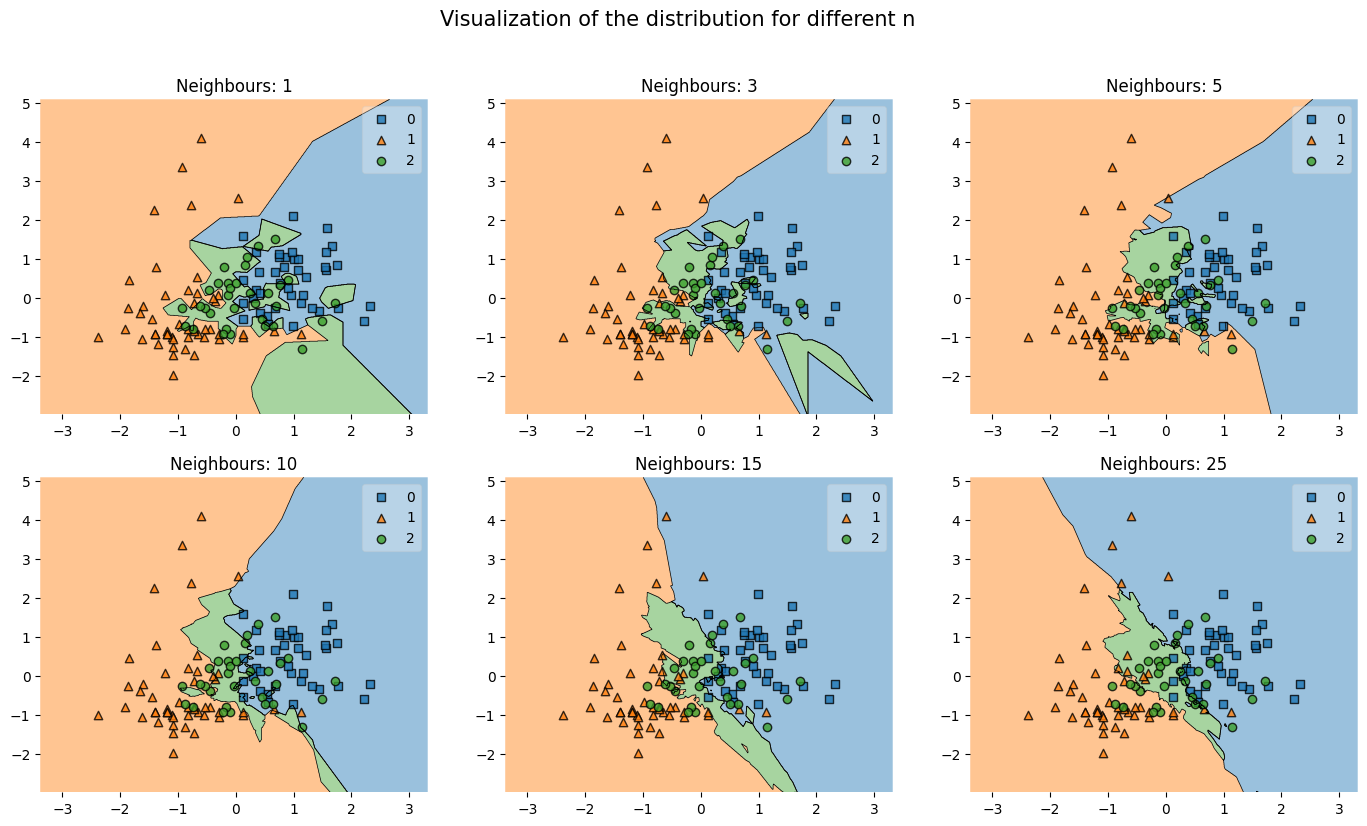

In [16]:
#создадим фигуру размером 17 на 9 и дадим ей название
fg = plt.figure(figsize=(17, 9))
plt.suptitle("Visualization of the distribution for different n", fontsize=15)
#создадим сетку для размещения графиков внутри фигуры размером 2 на 3
gs = gridspec.GridSpec(ncols=3, nrows=2, figure=fg)

#поочередно строим графики, отображающие разделение данных на классы, внутри сетки, используя plot_decision_regions().
#Даем соответсвующие названия графикам
graph_n1 = fg.add_subplot(gs[0, 0])
plot_decision_regions(X=data_for_train, y=y_train, clf=model_n1)
graph_n1.set_title("Neighbours: 1")

graph_n3 = fg.add_subplot(gs[0, 1])
plot_decision_regions(X=data_for_train, y=y_train, clf=model_n3)
graph_n3.set_title("Neighbours: 3")

graph_n5 = fg.add_subplot(gs[0, 2])
plot_decision_regions(X=data_for_train, y=y_train, clf=model_n5)
graph_n5.set_title("Neighbours: 5")

graph_n10 = fg.add_subplot(gs[1, 0])
plot_decision_regions(X=data_for_train, y=y_train, clf=model_n10)
graph_n10.set_title("Neighbours: 10")

graph_n15 = fg.add_subplot(gs[1, 1])
plot_decision_regions(X=data_for_train, y=y_train, clf=model_n15)
graph_n15.set_title("Neighbours: 15")

graph_n25 = fg.add_subplot(gs[1, 2])
plot_decision_regions(X=data_for_train, y=y_train, clf=model_n25)
graph_n25.set_title("Neighbours: 25")

### 1.6

Оптимальным количеством соседей является 5. Это заметно как по таблице, где доля верных ответов с таким выбором n наибольшая и на обучающей, и на тестовой выборке, так и по полученным решающим поверхностям: при n > 5 многие обозначения попадают уже не в свой цвет. Очевидно, что при = 1 и n = 3 наблюдается переобучение модели, так как точность на обучающей выборка высока (при n = 1 она равна 1), а вот на тестовой она заметно меньше (0.53 и 0.62 соответсвенно).

# Ex. 2 KNN with your own hands

In [17]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      #создаем поле в классе, которое будет содержать масштабированные данные, которые нужно запомнить, и целевую переменную для них
      self.transformed_data = np.c_[(X - np.mean(X)) / np.std(X), y]

    def predict(self, X):
      #создаем пустой массив, в который будем заносить целевую переменную для новых данных (т. е. где будут предикты), и
      #таблицу Х, которая будет представлять собой масштабированные входные данные
      result = []
      X = (X - np.mean(X)) / ((np.std(X) == 0) * 1 + np.std(X))

      #внутри цикла, который перебирает все входные данные (здесь - каждую пару 'alcohol' и 'magnesium'), мы создаем cur_v,
      #который является разностью матрицы запомненных данных и матрицы, все строки которой - это повторяющиеся данные, которые
      #нужно предсказать. Если мы найдем длину каждой вектор-строки, то получим все длины, между данными, которые нужно предсказать
      #и всеми запомненными данными. Найдя k наименьших длин с помощью np.argpartition() и подсчитав с помощью Counter()
      #все встречающиеся целевые переменные, мы можем сделать предикт для элемента.
      for i in range(len(X)):
        cur_v = self.transformed_data[:, :2] - np.full((len(self.transformed_data), 2), X[i])
        ind = np.argpartition(np.linalg.norm(cur_v, axis = 1), self.k)[:self.k]
        result.append(list(Counter(self.transformed_data[ind, 2]))[0])
      return np.array(result)

#объяснение здесь очень кривое, но, надеюсь, суть понятна

In [18]:
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [19]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

# Ex. 3 Linear regression

### Preparation

In [20]:
#читаем данные из github
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/eb2cd3de1f0d30edc2fedb958bf67397408dd324/2024/homeworks/hw04_knn_linreg/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Ex. 3.1

In [21]:
#аналогично 1.1. Убираем столбец Unnamed: 0, он не нужен
data = data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
pd.isna(data).sum()
print("Количество пропусков: ", pd.isna(data).sum().sum(), "\nПропусков нет")

Количество пропусков:  0 
Пропусков нет


### Ex. 3.2

In [22]:
#считаем корреляции между численными признаками
pd.DataFrame(data.corr(numeric_only=True))

#наиболее коррелирует с ценой carat, что неудивительно, потому что это масса бриллианта, а также его размеры (x, y, z)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


### Ex. 3.3

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
#создаем OneHotEncoder, обучаем его на наших данных и создаем таблицу закодированных категориальных признаков cut, color и clarity
#присоединяем полученную таблицу к исходной (имена столбикам даем с помощью get_feature_names_out()) и удаляем ненужные столбцы
OneHot = OneHotEncoder(sparse_output=False)
data_with_oneHot = pd.DataFrame(OneHot.fit_transform(data[['cut', 'color', 'clarity']]))
data_with_oneHot.columns = OneHot.get_feature_names_out()
data = data.join(data_with_oneHot)
data.drop(['cut', 'clarity', 'color'], axis=1, inplace=True)

In [25]:
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Ex. 3.4

In [26]:
from sklearn.preprocessing import KBinsDiscretizer

In [27]:
#воспользовавшись KBinsDiscretizer мы разбили все возможные цены на 300 отрезков. Добавим стобец otr, который
#отображает к какому отрезку принадлежит данные бриллиант
bins = KBinsDiscretizer(n_bins = 300, encode='ordinal')
data_with_bins = data['price'].to_numpy().reshape(-1, 1)
data_with_bins = bins.fit_transform(data_with_bins)
data = data.join(pd.DataFrame(data_with_bins))
data.rename(columns={0 : 'otr'}, inplace=True)

In [28]:
#переместим столбец с ценой в конец
data['price1'] = data['price']
data.drop('price', axis=1, inplace=True)
data.rename(columns={'price1' : 'price'}, inplace=True)

In [29]:
#аналогично 1.2. stratify установим по столбцу otr, таким образом, каждый диапазон будет представлен и в тестовой, и в обучающей выборке
data_train, data_test, price_train, price_test = train_test_split(data.iloc[:, :26], data.iloc[:, 27], test_size=0.3, random_state=np.random.seed(6), stratify=data['otr'])

### Ex. 3.5

In [30]:
#аналогично 1.3 масшатбируем данные, но не трогаем категориальные, которые сейчас закодированы
object = StandardScaler()
data_train.loc[:, ['carat', 'depth', 'table', 'x', 'y', 'z']] = object.fit_transform(data_train.loc[:, ['carat', 'depth', 'table', 'x', 'y', 'z']])
data_test.loc[:, ['carat', 'depth', 'table', 'x', 'y', 'z']] = object.fit_transform(data_test.loc[:, ['carat', 'depth', 'table', 'x', 'y', 'z']])
data.loc[:, ['carat', 'depth', 'table', 'x', 'y', 'z']] = object.fit_transform(data.loc[:, ['carat', 'depth', 'table', 'x', 'y', 'z']])

### Ex. 3.6

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
#используя LinearRegression создадим и обучим на обучающей выборке линейную регрессию. С помощью score() оценим
#работу регрессии на обучающей выборке, а с помощью mean_squared_error посчитаем среднеквадратичную ошибку на обучающей
#и тестовых выборках
LinearReg = LinearRegression()
LinearReg.fit(data_train, price_train)
print('Оценка на тренировочной выборке: ', LinearReg.score(data_train, price_train),
      '\nОшибка на тренировочной выборке: ', mean_squared_error(LinearReg.predict(data_train), price_train),
      '\nОшибка на тестовой выборке: ', mean_squared_error(LinearReg.predict(data_test), price_test))

Оценка на тренировочной выборке:  0.9182564482572559 
Ошибка на тренировочной выборке:  1300713.6436843218 
Ошибка на тестовой выборке:  1254498.1211254431


### Ex. 3.7

In [33]:
#выведем коэффициенты регрессии в виде таблицы
pd.DataFrame(data=LinearReg.coef_, columns=['Coef'], index=data_test.columns)

#нетрудно заметить, что самые большой коэффициент у carat (масса бриллианта очень важна), а самый маленький у
#clarity_SI2 (логично, потому что это самая грязная категория). Также выделяются х (не совсем логично), clarity_IF
#(самая чистая категория бриллиантов) и color_J (из представленных это самый дешевый цвет на рынке)

,Coef
carat,5261.371665
depth,-86.651160
table,-48.449612
x,-1517.514445
y,469.281885
z,-38.563500
cut_Fair,-587.429438
cut_Good,1.744001
cut_Ideal,256.078045
cut_Premium,189.982789


### Ex. 3.8

In [34]:
from sklearn import linear_model

In [35]:
#создадим и обучим модели Lasso и Ridge
lasso = linear_model.Lasso(alpha=10)
lasso.fit(data_train, price_train)
ridge = linear_model.Ridge(alpha=10)
ridge.fit(data_train, price_train)

Ridge(alpha=10)

In [36]:
#выведем таблицу, где в первых трех столбцах содержатся коэффициенты трех различных регрессий, а
#а в последних двух - отношение коэффициентов Lasso и Ridge регрессий к коэффициентам обычной линейной
#т. е. они отображают прирост/уменьшение
pd.DataFrame(data=np.vstack([LinearReg.coef_, lasso.coef_, ridge.coef_, lasso.coef_ / LinearReg.coef_, ridge.coef_ / LinearReg.coef_]).T,
             columns=['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Lasso Change', 'Ridge Change'], index=data_test.columns)

#многие веса практически не изменились, но есть такие, которые поменялись.
#Для Lasso: cреди них х, y, z (полагаю, что размер сильно связан с массой), а также бывшые категориальные
#признаки (логично, ведь они связаны)
#Для Ridge: почти ничего не изменилось, только cut_Good стал в 2 раза больше

,Linear Regression,Lasso Regression,Ridge Regression,Lasso Change,Ridge Change
carat,5261.371665,4805.088975,5224.830212,0.913277,0.993055
depth,-86.651160,-100.483250,-85.970615,1.159630,0.992146
table,-48.449612,-69.071728,-49.165218,1.425640,1.014770
x,-1517.514445,-667.822973,-1359.598167,0.440077,0.895938
y,469.281885,-0.000000,347.797036,-0.000000,0.741126
z,-38.563500,-33.861168,-41.645976,0.878063,1.079932
cut_Fair,-587.429438,-463.715352,-594.656390,0.789398,1.012303
cut_Good,1.744001,-24.500786,4.151266,-14.048612,2.380312
cut_Ideal,256.078045,94.242453,258.393656,0.368022,1.009043
cut_Premium,189.982789,0.000000,187.346802,0.000000,0.986125


### Ex. 3.9

In [37]:
#создаем и обучаем для пяти различных альфа Lasso регрессию и выводим все коэффициенты в виде таблицы
alphas = [0.1, 1, 10, 100, 200]
coefs_for_lasso = pd.DataFrame(data=np.array([linear_model.Lasso(alpha=i).fit(data_train, price_train).coef_ for i in alphas]).T,
                               columns=['alpha=0.1', 'alpha=1', 'alpha=10', 'alpha=100', 'alpha=200'],  index=data_test.columns)
coefs_for_lasso

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.065e+09, tolerance: 6.008e+07
  model = cd_fast.enet_coordinate_descent(


,alpha=0.1,alpha=1,alpha=10,alpha=100,alpha=200
carat,5257.882253,5228.130053,4805.088975,3632.724658,3472.275128
depth,-87.301009,-91.912762,-100.483250,-65.975320,-0.000000
table,-48.893127,-51.743228,-69.071728,-49.443223,-0.000000
x,-1433.881935,-1028.562946,-667.822973,0.000000,0.000000
y,388.209284,0.000000,-0.000000,0.000000,0.000000
z,-38.025084,-30.473125,-33.861168,0.000000,0.000000
cut_Fair,-729.686349,-730.200938,-463.715352,-0.000000,-0.000000
cut_Good,-137.812056,-133.038128,-24.500786,-0.000000,-0.000000
cut_Ideal,114.460267,103.795206,94.242453,0.000000,0.000000
cut_Premium,45.347601,18.933916,0.000000,-0.000000,-0.000000


In [38]:
#опять же в виде таблицы выводим нормы векторов коэффициентов
pd.DataFrame(data=np.linalg.norm(coefs_for_lasso.to_numpy(), axis=0), columns=['Norm of coefs'], index=['alpha=0.1', 'alpha=1', 'alpha=10', 'alpha=100', 'alpha=200'])

#агрессивнее всего веса уменьшает альфа = 200. Lasso регрессию удобно использовать
#для обнаружения мультикорреляции. Удалив коррелирующие признаки или урезав их веса,
#мы можем найти более точные веса

,Norm of coefs
alpha=0.1,7664.818648
alpha=1,7568.411699
alpha=10,6658.957067
alpha=100,3666.432853
alpha=200,3472.275128


### Ex. 3.10

In [39]:
#создадим массив numpy, который содержит различные альфа для LassoCV
als = np.arange(1, 210, 10)

#создадим LassoCV, укажем количество разделений для кросс-валидации равное пяти и обучим
cross_lasso = linear_model.LassoCV(alphas=als, cv=5)
cross_lasso.fit(data_train, price_train)

#создадим таблицу, где покажем среднюю ошибку (MSE) для каждого альфа
mean_mse = pd.DataFrame(data=np.mean(cross_lasso.mse_path_, axis=1), columns=['Mean MSE'], index=cross_lasso.alphas_)
mean_mse.index.name = 'Alphas'
mean_mse

#очевидно, что наименьшая ошибка при альфа = 1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87900952.23327637, tolerance: 48397907.66167233
  model = cd_fast.enet_coordinate_descent_gram(


,Mean MSE
Alphas,
201,2.467898e+06
191,2.463979e+06
181,2.460260e+06
171,2.456741e+06
161,2.453422e+06
151,2.426742e+06
141,2.394836e+06
131,2.363050e+06
121,2.329901e+06


### Ex. 3.11

In [40]:
#создадим и обучим Lasso регрессию с альфа = 1 и выведем коэффициенты в виде таблицы
effective_lasso = linear_model.Lasso(alpha=1)
effective_lasso.fit(data_train, price_train)
pd.DataFrame(data=effective_lasso.coef_, columns=['Coefs'], index=data_train.columns)

#заметим, что наиболее неинформативными оказались y и z (скорее всего из-за х, если бриллиант большой в ширину, то
#в длину и высоту он тоже немаленький), depth и table (эти парамметры высчитываются из размеров), а также часть
#закодированных категориальных призаков (наиболее полезные имеют больший по модулю коэффициент, а вот оставшивеся намного меньше)

,Coefs
carat,5228.130053
depth,-91.912762
table,-51.743228
x,-1028.562946
y,0.000000
z,-30.473125
cut_Fair,-730.200938
cut_Good,-133.038128
cut_Ideal,103.795206
cut_Premium,18.933916


### Ex. 3.12

In [41]:
print("Ошибка на тестовой выборке (Linear Regression): ", mean_squared_error(LinearReg.predict(data_test), price_test),
      "\nОшибка на тестовой выборке (Lasso Regression): ", mean_squared_error(effective_lasso.predict(data_test), price_test))

#как мы видим, Lasso регрессия выдает меньшую ошибку (хоть и не сильно). Так происходит из-за нескольких коррелирующих между собой признаков.
#Однако из-за того что таких признаков мало и коррелируют они незначительно, ошибки примерно равны

Ошибка на тестовой выборке (Linear Regression):  1254498.1211254431 
Ошибка на тестовой выборке (Lasso Regression):  1221416.8775087083
